In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import os
from tqdm import tqdm


In [22]:
from itertools import combinations

# Define the set of elements for D and E
set_D_E = [{'Co'}, {'V'}, {'Mn'}, {'Mo'}, {'Cu'}, {'Nb'}, {'W'}, {'Ti'}, {'Al'}, {'Si'}, {'Ta'}]

# Generate all possible combinations of D and E
compo_D_E_list = list(combinations(set_D_E, 2))

compo_A_B_C_D_E_list = []
compo_A_B_C_D_E_label_list = []
for compo_D_E in compo_D_E_list:
    # Convert the current combination to a list and flatten it
    compo_D_E_list = [item for sublist in compo_D_E for item in sublist]
    
    # Define the current combination of A, B, C, D, E
    compo_A_B_C_D_E = ['Fe', 'Cr', 'Ni'] + compo_D_E_list
    compo_A_B_C_D_E_merge = '_'.join([*compo_A_B_C_D_E])


    compo_A_B_C_D_E_label_merge = '-'.join([*compo_A_B_C_D_E])
    compo_A_B_C_D_E_list.append(compo_A_B_C_D_E_merge)
    compo_A_B_C_D_E_label_list.append(compo_A_B_C_D_E_label_merge)


In [23]:
# Define a list of compositions to iterate over
# compo_A_B_C_D_E_list = ['Fe_Cr_Ni_Mn_Ta', 'Fe_Cr_Ni_Mn_Ti', 'Fe_Cr_Ni_Mn_W']

# Initialize lists to hold dataframes
fcc_fractions_byPalette_list    = []
SSS_fcc_byCompo_list            = []
H1_C2_mean_std_fcc_byCompo_list = [] 

# Loop over each composition and read in relevant data
for compo_A_B_C_D_E_fname, compo_A_B_C_D_E_label in tqdm(zip(compo_A_B_C_D_E_list, compo_A_B_C_D_E_label_list)):
    print(compo_A_B_C_D_E_label)

    # ----------------------------------------------------------------------------------------------------
    # Read in the FCC phase stability dataframe and add composition label
    fcc_fractions_byPalette = pd.read_excel('v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/count_fcc_fractions_byPalette.xlsx')
    fcc_fractions_byPalette = fcc_fractions_byPalette.assign(compo_A_B_C_D_E = compo_A_B_C_D_E_label)
    
    # Add labels for FCC phase stability types
    fcc_fractions_byPalette = fcc_fractions_byPalette.assign(Gmin_FCC    = 'min Gibbs energy')
    fcc_fractions_byPalette = fcc_fractions_byPalette.assign(eq_FCC      = 'full equilibrium')
    
    # Append the updated dataframe to the list
    fcc_fractions_byPalette_list.append(fcc_fractions_byPalette)  


    # ----------------------------------------------------------------------------------------------------
    # Read in the SSS and FCC fractions by composition dataframes
    SSS_byCompo           = pd.read_excel('v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/SSS_byCompo.xlsx')
    fcc_fractions_byCompo = pd.read_excel('v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/count_fcc_fractions_byCompo.xlsx')

    # Merge the two dataframes
    SSS_fcc_byCompo       = pd.concat([SSS_byCompo, fcc_fractions_byCompo[['Gmin_FCC', 'eq_FCC', 'Gmin_eq_FCC']]], axis=1)

    # Create a new column 'sigma_SSS_FCC' for SSS values corresponding to FCC phase stability
    SSS_fcc_byCompo['sigma_SSS_FCC'] = SSS_fcc_byCompo.loc[SSS_fcc_byCompo['Gmin_eq_FCC'] == 1, 'sigma_SSS']
    SSS_fcc_byCompo = SSS_fcc_byCompo.assign(compo_A_B_C_D_E = compo_A_B_C_D_E_label)

    # Saving the new `SSS_FCC_byCompo.xlsx`
    if os.path.exists('v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/SSS_FCC_byCompo.xlsx'):
        print('SSS_FCC_byCompo.xlsx: File already exists.')
        # SSS_fcc_byCompo.to_excel('v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/SSS_FCC_byCompo.xlsx')
    else:
        SSS_fcc_byCompo.to_excel('v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/SSS_FCC_byCompo.xlsx')
        print('Saving '+'v6_' + compo_A_B_C_D_E_fname + '_Sputtering' + '/SSS_FCC_byCompo.xlsx')

    # Append the updated dataframe to the list
    SSS_fcc_byCompo_list.append(SSS_fcc_byCompo)


    # ----------------------------------------------------------------------------------------------------
    newdata_path = '/Users/ywu/InSync/2021_MPIE/2021-12_H Diffusion/Matlab Toolbox HEA/v6_A-B-C-D-E_Sputtering_ML_master/v6_A-B-C-D-E_Sputtering_ML_before/'
    H1_C2_mean_std_fcc_byCompo = pd.read_excel(newdata_path + 'v6_' + compo_A_B_C_D_E_fname + '_SSS_FCC_byCompo_at_pct_ML.xlsx')
    
    # Create a new column 'sigma_SSS_FCC' for SSS values corresponding to FCC phase stability
    H1_C2_mean_std_fcc_byCompo['H1_new_pred_KFold_mean_FCC'] = H1_C2_mean_std_fcc_byCompo.loc[H1_C2_mean_std_fcc_byCompo['Gmin_eq_FCC'] == 1, 'H1_new_pred_KFold_mean']
    H1_C2_mean_std_fcc_byCompo['H1_new_pred_KFold_std_FCC']  = H1_C2_mean_std_fcc_byCompo.loc[H1_C2_mean_std_fcc_byCompo['Gmin_eq_FCC'] == 1, 'H1_new_pred_KFold_std']
    H1_C2_mean_std_fcc_byCompo['C2_new_pred_KFold_mean_FCC'] = H1_C2_mean_std_fcc_byCompo.loc[H1_C2_mean_std_fcc_byCompo['Gmin_eq_FCC'] == 1, 'C2_new_pred_KFold_mean']
    H1_C2_mean_std_fcc_byCompo['C2_new_pred_KFold_std_FCC']  = H1_C2_mean_std_fcc_byCompo.loc[H1_C2_mean_std_fcc_byCompo['Gmin_eq_FCC'] == 1, 'C2_new_pred_KFold_std']
     
    # Saving the excel: H1 C2 when FCC==1
    if os.path.exists(newdata_path + 'v6_' + compo_A_B_C_D_E_fname + '_SSS_FCC_byCompo_at_pct_ML_fcc.xlsx'):
        print('SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.')
        # H1_C2_mean_std_fcc_byCompo.to_excel(newdata_path + 'v6_' + compo_A_B_C_D_E_fname + '_SSS_FCC_byCompo_at_pct_ML_fcc.xlsx')
    else:
        H1_C2_mean_std_fcc_byCompo.to_excel(newdata_path + 'v6_' + compo_A_B_C_D_E_fname + '_SSS_FCC_byCompo_at_pct_ML_fcc.xlsx')
        print('Saving ' + 'v6_' + compo_A_B_C_D_E_fname + '_SSS_FCC_byCompo_at_pct_ML_fcc.xlsx')

    # Append the updated dataframe to the list
    H1_C2_mean_std_fcc_byCompo_list.append(H1_C2_mean_std_fcc_byCompo)
    
    # ----------------------------------------------------------------------------------------------------
 
# Display the first two rows of the loaded dataframes
display(fcc_fractions_byPalette_list[0].head(2))
display(SSS_fcc_byCompo_list[0].head(2))
display(H1_C2_mean_std_fcc_byCompo_list[0].head(2))

0it [00:00, ?it/s]

Fe-Cr-Ni-Co-V
SSS_FCC_byCompo.xlsx: File already exists.


1it [00:05,  5.45s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-Mn
SSS_FCC_byCompo.xlsx: File already exists.


2it [00:11,  5.52s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-Mo
SSS_FCC_byCompo.xlsx: File already exists.


3it [00:15,  4.99s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-Cu
SSS_FCC_byCompo.xlsx: File already exists.


4it [00:20,  4.89s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-Nb
SSS_FCC_byCompo.xlsx: File already exists.


5it [00:25,  4.89s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-W
SSS_FCC_byCompo.xlsx: File already exists.


6it [00:30,  4.96s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-Ti
SSS_FCC_byCompo.xlsx: File already exists.


7it [00:34,  4.78s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-Al
SSS_FCC_byCompo.xlsx: File already exists.


8it [00:39,  4.75s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-Si
SSS_FCC_byCompo.xlsx: File already exists.


9it [00:43,  4.68s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Co-Ta
SSS_FCC_byCompo.xlsx: File already exists.


10it [00:48,  4.61s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-Mn
SSS_FCC_byCompo.xlsx: File already exists.


11it [00:52,  4.61s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-Mo
SSS_FCC_byCompo.xlsx: File already exists.


12it [00:57,  4.73s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-Cu
SSS_FCC_byCompo.xlsx: File already exists.


13it [01:02,  4.75s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-Nb
SSS_FCC_byCompo.xlsx: File already exists.


14it [01:07,  4.93s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-W
SSS_FCC_byCompo.xlsx: File already exists.


15it [01:13,  4.99s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-Ti
SSS_FCC_byCompo.xlsx: File already exists.


16it [01:17,  4.95s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-Al
SSS_FCC_byCompo.xlsx: File already exists.


17it [01:22,  4.83s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-Si
SSS_FCC_byCompo.xlsx: File already exists.


18it [01:27,  4.94s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-V-Ta
SSS_FCC_byCompo.xlsx: File already exists.


19it [01:32,  4.94s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mn-Mo
SSS_FCC_byCompo.xlsx: File already exists.


20it [01:38,  5.15s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mn-Cu
SSS_FCC_byCompo.xlsx: File already exists.


21it [01:43,  5.25s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mn-Nb
SSS_FCC_byCompo.xlsx: File already exists.


22it [01:51,  5.86s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mn-W
SSS_FCC_byCompo.xlsx: File already exists.


23it [01:57,  6.10s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mn-Ti
SSS_FCC_byCompo.xlsx: File already exists.


24it [02:03,  6.14s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mn-Al
SSS_FCC_byCompo.xlsx: File already exists.


25it [02:10,  6.38s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mn-Si
SSS_FCC_byCompo.xlsx: File already exists.


26it [02:18,  6.79s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mn-Ta
SSS_FCC_byCompo.xlsx: File already exists.


27it [02:27,  7.30s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mo-Cu
SSS_FCC_byCompo.xlsx: File already exists.


28it [02:33,  6.90s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mo-Nb
SSS_FCC_byCompo.xlsx: File already exists.


29it [02:38,  6.45s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mo-W
SSS_FCC_byCompo.xlsx: File already exists.


30it [02:43,  6.15s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mo-Ti
SSS_FCC_byCompo.xlsx: File already exists.


31it [02:49,  6.09s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mo-Al
SSS_FCC_byCompo.xlsx: File already exists.


32it [02:55,  5.81s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mo-Si
SSS_FCC_byCompo.xlsx: File already exists.


33it [02:59,  5.38s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Mo-Ta
SSS_FCC_byCompo.xlsx: File already exists.


34it [03:03,  5.10s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Cu-Nb
SSS_FCC_byCompo.xlsx: File already exists.


35it [03:08,  4.92s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Cu-W
SSS_FCC_byCompo.xlsx: File already exists.


36it [03:12,  4.79s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Cu-Ti
SSS_FCC_byCompo.xlsx: File already exists.


37it [03:17,  4.77s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Cu-Al
SSS_FCC_byCompo.xlsx: File already exists.


38it [03:22,  4.75s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Cu-Si
SSS_FCC_byCompo.xlsx: File already exists.


39it [03:27,  4.80s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Cu-Ta
SSS_FCC_byCompo.xlsx: File already exists.


40it [03:31,  4.77s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Nb-W
SSS_FCC_byCompo.xlsx: File already exists.


41it [03:37,  5.01s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Nb-Ti
SSS_FCC_byCompo.xlsx: File already exists.


42it [03:42,  4.98s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Nb-Al
SSS_FCC_byCompo.xlsx: File already exists.


43it [03:47,  4.96s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Nb-Si
SSS_FCC_byCompo.xlsx: File already exists.


44it [03:52,  5.05s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Nb-Ta
SSS_FCC_byCompo.xlsx: File already exists.


45it [03:57,  4.95s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-W-Ti
SSS_FCC_byCompo.xlsx: File already exists.


46it [04:02,  5.11s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-W-Al
SSS_FCC_byCompo.xlsx: File already exists.


47it [04:07,  4.99s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-W-Si
SSS_FCC_byCompo.xlsx: File already exists.


48it [04:12,  4.88s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-W-Ta
SSS_FCC_byCompo.xlsx: File already exists.


49it [04:16,  4.79s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Ti-Al
SSS_FCC_byCompo.xlsx: File already exists.


50it [04:21,  4.86s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Ti-Si
SSS_FCC_byCompo.xlsx: File already exists.


51it [04:26,  4.78s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Ti-Ta
SSS_FCC_byCompo.xlsx: File already exists.


52it [04:30,  4.60s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Al-Si
SSS_FCC_byCompo.xlsx: File already exists.


53it [04:35,  4.59s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Al-Ta
SSS_FCC_byCompo.xlsx: File already exists.


54it [04:39,  4.57s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.
Fe-Cr-Ni-Si-Ta
SSS_FCC_byCompo.xlsx: File already exists.


55it [04:44,  5.17s/it]

SSS_FCC_byCompo_at_pct_ML_fcc.xlsx: File already exists.


,ABCDE,Gmin_FCC_fraction,eq_FCC_fraction,Gmin_eq_FCC_fraction,compo_A_B_C_D_E,Gmin_FCC,eq_FCC
0,V-Co-Ni-Cr-Fe,57.971014,44.927536,44.927536,Fe-Cr-Ni-Co-V,min Gibbs energy,full equilibrium
1,V-Co-Ni-Fe-Cr,55.072464,52.173913,49.275362,Fe-Cr-Ni-Co-V,min Gibbs energy,full equilibrium


,Fe,Cr,Ni,Co,V,ShearModulus_eff,PoissonsRatio_eff,delta_prime_misfit,sigma_SSS,Gmin_FCC,eq_FCC,Gmin_eq_FCC,sigma_SSS_FCC,compo_A_B_C_D_E
0,0.33,0.03,0.05,0.12,0.47,63.740744,0.329844,0.092273,456.766541,0,0.0,0,NaN,Fe-Cr-Ni-Co-V
1,0.39,0.05,0.05,0.11,0.40,66.837689,0.322980,0.091240,464.791066,0,0.0,0,NaN,Fe-Cr-Ni-Co-V


,Unnamed: 0,Var1,Fe,Cr,Ni,Co,V,ShearModulus_eff,PoissonsRatio_eff,delta_prime_misfit,...,VEC,sigma_bulk_modulus,H1_new_pred_KFold_mean,H1_new_pred_KFold_std,C2_new_pred_KFold_mean,C2_new_pred_KFold_std,H1_new_pred_KFold_mean_FCC,H1_new_pred_KFold_std_FCC,C2_new_pred_KFold_mean_FCC,C2_new_pred_KFold_std_FCC
0,0,0,33.0,3.0,5.0,12.0,47.0,63.740744,0.329844,0.092273,...,6.75,7.490661,222.351852,100.376816,261.414612,231.712891,NaN,NaN,NaN,NaN
1,1,1,39.0,5.0,5.0,11.0,40.0,66.837689,0.322980,0.091240,...,6.91,7.251896,237.455154,90.997993,262.986542,215.029984,NaN,NaN,NaN,NaN


#### rank the sequence of ABCDE

In [24]:
# ----- rank by `Gmin_eq_FCC_mean`
# # Calculate the mean of the Gmin_eq_FCC_fraction for each set of data and rank them in descending order
# Gmin_eq_FCC_mean = [np.mean(fcc_fractions_byPalette['Gmin_eq_FCC_fraction'].values) 
#                     for fcc_fractions_byPalette in fcc_fractions_byPalette_list]
# print(Gmin_eq_FCC_mean)

# ranked_indices = np.argsort(Gmin_eq_FCC_mean)[::-1]  # Sort in descending order

# Gmin_eq_FCC_mean_sort = [Gmin_eq_FCC_mean[i] for i in ranked_indices]  # Sort the mean values in the ranked order
# print(Gmin_eq_FCC_mean_sort)


# ----- rank by `Gmin_eq_FCC_max`
# Calculate the max of the Gmin_eq_FCC_fraction for each set of data and rank them in descending order
Gmin_eq_FCC_max = [np.max(fcc_fractions_byPalette['Gmin_eq_FCC_fraction'].values) 
                    for fcc_fractions_byPalette in fcc_fractions_byPalette_list]
print(Gmin_eq_FCC_max)

ranked_indices = np.argsort(Gmin_eq_FCC_max)[::-1]  # Sort in descending order

Gmin_eq_FCC_max_sort = [Gmin_eq_FCC_max[i] for i in ranked_indices]  # Sort the mean values in the ranked order
print(Gmin_eq_FCC_max_sort)

# ----------
# Sort the list of dataframes based on the ranked order of mean values
compo_A_B_C_D_E_sort_list            = [compo_A_B_C_D_E_list[i] for i in ranked_indices]
print(compo_A_B_C_D_E_sort_list)

fcc_fractions_byPalette_sort_list    = [fcc_fractions_byPalette_list[i] for i in ranked_indices]
SSS_fcc_byCompo_sort_list            = [SSS_fcc_byCompo_list[i] for i in ranked_indices]

H1_C2_mean_std_fcc_byCompo_sort_list = [H1_C2_mean_std_fcc_byCompo_list[i] for i in ranked_indices]


[50.72463768115942, 79.71014492753623, 17.391304347826086, 34.78260869565217, 17.391304347826086, 24.637681159420293, 30.434782608695656, 36.231884057971016, 43.47826086956522, 17.391304347826086, 28.985507246376812, 18.84057971014493, 21.73913043478261, 11.594202898550725, 10.144927536231885, 11.594202898550725, 15.942028985507244, 18.84057971014493, 7.246376811594203, 36.231884057971016, 44.927536231884055, 13.043478260869565, 15.942028985507244, 24.637681159420293, 30.434782608695656, 26.08695652173913, 11.594202898550725, 23.18840579710145, 8.695652173913043, 5.797101449275362, 11.594202898550725, 17.391304347826086, 10.144927536231885, 4.3478260869565215, 10.144927536231885, 8.695652173913043, 18.84057971014493, 21.73913043478261, 15.942028985507244, 4.3478260869565215, 4.3478260869565215, 2.898550724637681, 8.695652173913043, 2.898550724637681, 0, 4.3478260869565215, 5.797101449275362, 2.898550724637681, 1.4492753623188406, 11.594202898550725, 11.594202898550725, 1.44927536231884

#### modify the df for plotting: `fcc_fractions_byPalette_sort_list`

In [25]:
# Create an empty list to store the modified dataframes
df_fcc_byPalette_sns_new_list = []

# Loop over each dataframe in the list of sorted FCC fractions by palette
for df_fcc_byPalette_sns in fcc_fractions_byPalette_sort_list:

    # Select the desired columns for the first dataframe and rename the columns
    df_fcc_byPalette_sns1 = df_fcc_byPalette_sns[['ABCDE', 'Gmin_FCC_fraction', 'Gmin_FCC',  
                                            'Gmin_eq_FCC_fraction', 'compo_A_B_C_D_E']]
    df_fcc_byPalette_sns1 = df_fcc_byPalette_sns1.rename(columns={'Gmin_FCC': 'minG vs.full equil.'})
    df_fcc_byPalette_sns1 = df_fcc_byPalette_sns1.rename(columns={'Gmin_FCC_fraction': 'Gmin_vs_eq_FCC_fraction'})

    # Select the desired columns for the second dataframe and rename the columns
    df_fcc_byPalette_sns2= df_fcc_byPalette_sns[['ABCDE', 'eq_FCC_fraction', 'eq_FCC',  
                                                'compo_A_B_C_D_E']]
    df_fcc_byPalette_sns2 = df_fcc_byPalette_sns2.rename(columns={'eq_FCC': 'minG vs.full equil.'})
    df_fcc_byPalette_sns2 = df_fcc_byPalette_sns2.rename(columns={'eq_FCC_fraction': 'Gmin_vs_eq_FCC_fraction'})

    # Concatenate the two dataframes vertically
    df_fcc_byPalette_sns_new = pd.concat([df_fcc_byPalette_sns1, df_fcc_byPalette_sns2], axis=0)

    # Add the modified dataframe to the list
    df_fcc_byPalette_sns_new_list.append(df_fcc_byPalette_sns_new)


#### dataframes to be plotted
* `df_fcc_sns` 
* `df_fcc_sns_30` 
* `df_SSS_sns` 
* `df_SSS_sns_30`
* `df_H1_C2_sns` 
* `df_H1_C2_sns_30`

In [26]:
# Concatenate the modified dataframes in the list vertically to create a new dataframe
df_fcc_sns    = pd.concat(df_fcc_byPalette_sns_new_list, axis=0)
df_fcc_sns_30 = pd.concat(df_fcc_byPalette_sns_new_list[0:30], axis=0)

# Concatenate the list of SSS dataframes vertically to create a new dataframe
df_SSS_sns    = pd.concat(SSS_fcc_byCompo_sort_list, axis=0)
df_SSS_sns_30 = pd.concat(SSS_fcc_byCompo_sort_list[0:30], axis=0)

# Concatenate the list of H1_C2 dataframes vertically to create a new dataframe
df_H1_C2_sns    = pd.concat(H1_C2_mean_std_fcc_byCompo_sort_list, axis=0)
df_H1_C2_sns_30 = pd.concat(H1_C2_mean_std_fcc_byCompo_sort_list[0:30], axis=0)

# Display the first row of the new SSS dataframe
display(df_fcc_sns.head(1))
display(df_SSS_sns.head(1))
display(df_H1_C2_sns.head(1))
display(df_H1_C2_sns.columns)

,ABCDE,Gmin_vs_eq_FCC_fraction,minG vs.full equil.,Gmin_eq_FCC_fraction,compo_A_B_C_D_E
0,Mn-Co-Ni-Cr-Fe,60.869565,min Gibbs energy,59.42029,Fe-Cr-Ni-Co-Mn


,Fe,Cr,Ni,Co,Mn,ShearModulus_eff,PoissonsRatio_eff,delta_prime_misfit,sigma_SSS,Gmin_FCC,...,compo_A_B_C_D_E,V,Cu,Si,Al,Mo,Ti,W,Nb,Ta
0,0.33,0.03,0.05,0.12,0.47,81.342074,0.266533,0.041722,133.665273,1.0,...,Fe-Cr-Ni-Co-Mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,Var1,Fe,Cr,Ni,Co,Mn,ShearModulus_eff,PoissonsRatio_eff,delta_prime_misfit,...,C2_new_pred_KFold_std_FCC,V,Cu,Si,Al,Mo,Ti,W,Nb,Ta
0,0,0,33.0,3.0,5.0,12.0,47.0,81.342074,0.266533,0.041722,...,174.624298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['Unnamed: 0', 'Var1', 'Fe', 'Cr', 'Ni', 'Co', 'Mn', 'ShearModulus_eff',
       'PoissonsRatio_eff', 'delta_prime_misfit', 'sigma_SSS', 'Gmin_FCC',
       'eq_FCC', 'Gmin_eq_FCC', 'sigma_SSS_FCC', 'compo_A_B_C_D_E', 'FORMULA',
       'delta_a', 'Hmix', 'VEC', 'sigma_bulk_modulus',
       'H1_new_pred_KFold_mean', 'H1_new_pred_KFold_std',
       'C2_new_pred_KFold_mean', 'C2_new_pred_KFold_std',
       'H1_new_pred_KFold_mean_FCC', 'H1_new_pred_KFold_std_FCC',
       'C2_new_pred_KFold_mean_FCC', 'C2_new_pred_KFold_std_FCC', 'V', 'Cu',
       'Si', 'Al', 'Mo', 'Ti', 'W', 'Nb', 'Ta'],
      dtype='object')

#### the first 30 alloys by max FCC fraction per palette

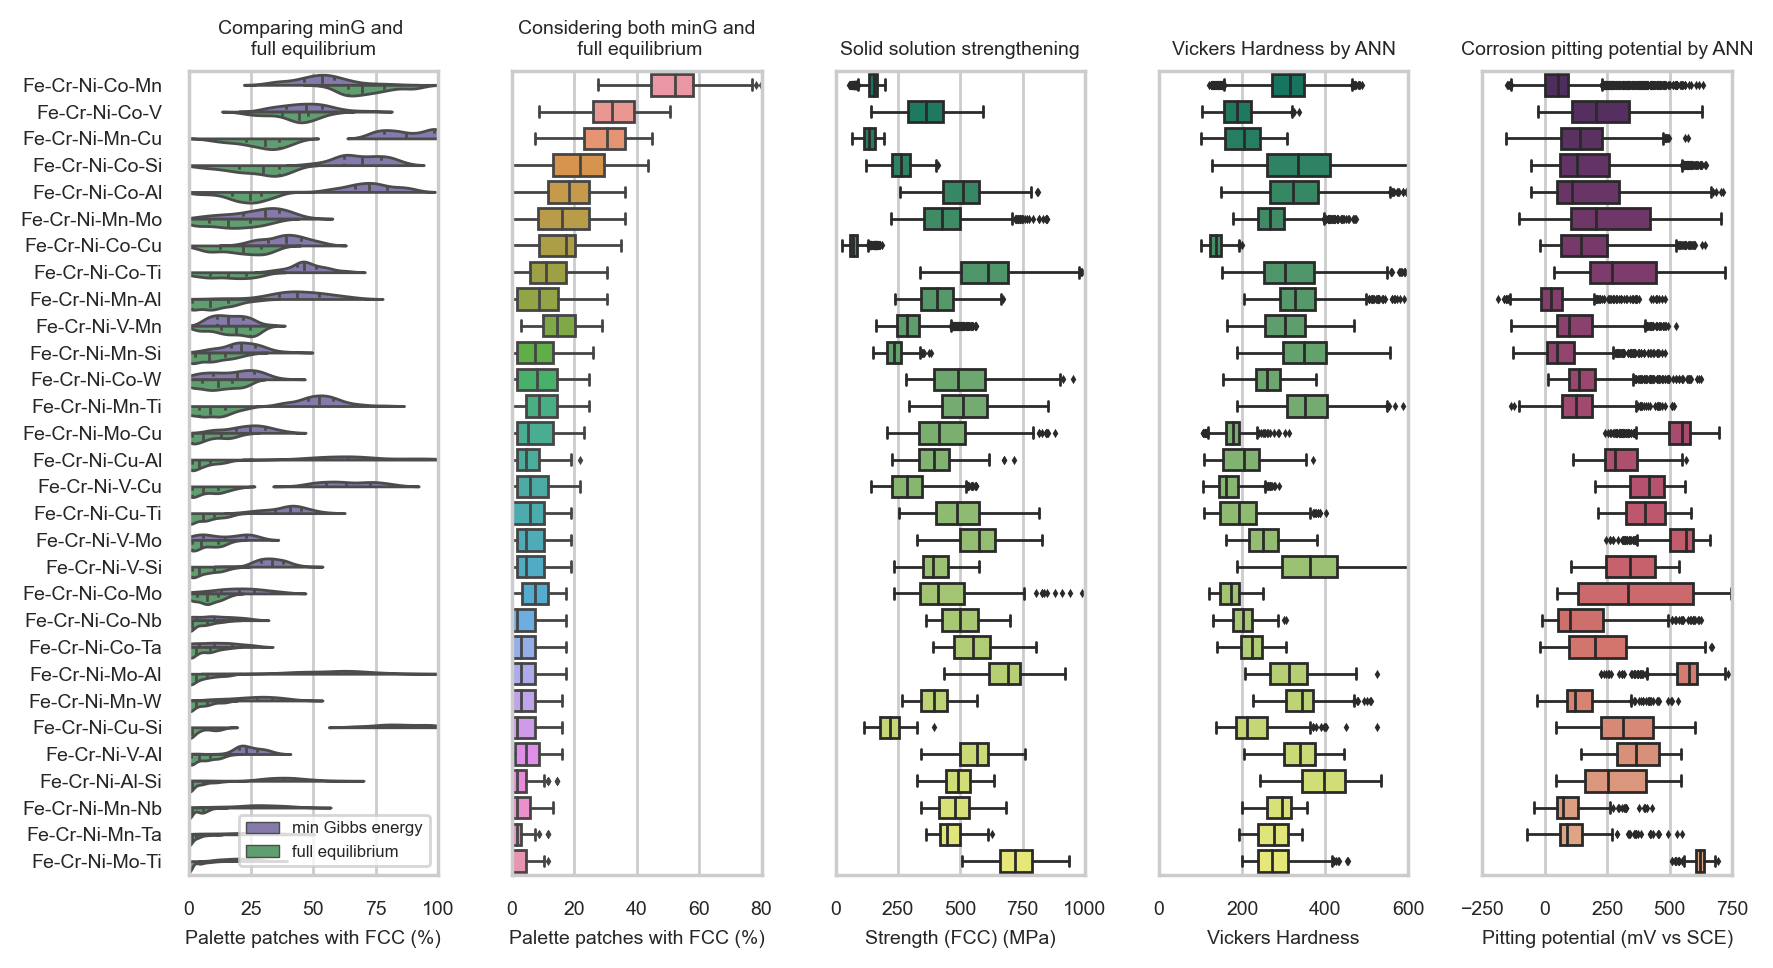

In [27]:
fig, axs = plt.subplots(ncols=5, figsize=(9, 5), dpi=200)
sns.set_theme(style="whitegrid")
font_size = 7

sns.violinplot(data = df_fcc_sns_30, x="Gmin_vs_eq_FCC_fraction", y="compo_A_B_C_D_E", hue="minG vs.full equil.",
               split=True, inner="quart", linewidth=1,
               palette={"min Gibbs energy": "m", "full equilibrium": "g"}, ax=axs[0])
# sns.despine(left=True, ax=axs[0])
title = "Comparing minG and full equilibrium"
wrapped_title = "\n".join(title[i:i+19] for i in range(0, len(title), 19))
axs[0].set_title(wrapped_title, fontsize=font_size)
axs[0].set_xlabel('Palette patches with FCC (%)', fontsize=font_size)
axs[0].set_ylabel(None)
axs[0].legend(fontsize=font_size-1, loc='lower right')
axs[0].set_xlim([0, 100])
axs[0].tick_params(axis='both', labelsize=font_size)


sns.boxplot(data = df_fcc_sns_30, x="Gmin_eq_FCC_fraction", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[1]) # palette="summer"
# sns.despine(left=True, ax=axs[1])
title = "Considering both minG and full equilibrium"
wrapped_title = "\n".join(title[i:i+25] for i in range(0, len(title), 25))
axs[1].set_title(wrapped_title, fontsize=font_size)
axs[1].set_xlabel('Palette patches with FCC (%)', fontsize=font_size)
axs[1].set_ylabel(None)
axs[1].set_xlim([0, 80])
axs[1].set_yticklabels([])
axs[1].tick_params(axis='both', labelsize=font_size)


sns.boxplot(data = df_SSS_sns_30, x="sigma_SSS_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[2], palette="summer")
# sns.despine(left=True, ax=axs[2])
axs[2].set_title('Solid solution strengthening', fontsize=font_size)
axs[2].set_xlabel('Strength (FCC) (MPa)', fontsize=font_size)
axs[2].set_ylabel(None)
axs[2].set_yticklabels([])
axs[2].set_xlim([0, 1000])
axs[2].tick_params(axis='both', labelsize=font_size)


sns.boxplot(data = df_H1_C2_sns_30, x="H1_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[3], palette="summer")
# sns.despine(left=True, ax=axs[2])
axs[3].set_title('Vickers Hardness by ANN', fontsize=font_size)
axs[3].set_xlabel('Vickers Hardness', fontsize=font_size)
axs[3].set_ylabel(None)
axs[3].set_yticklabels([])
axs[3].set_xlim([0, 600])
axs[3].tick_params(axis='both', labelsize=font_size)

sns.boxplot(data = df_H1_C2_sns_30, x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[4], palette="flare_r")
# sns.despine(left=True, ax=axs[2])
axs[4].set_title('Corrosion pitting potential by ANN', fontsize=font_size)
axs[4].set_xlabel('Pitting potential (mV vs SCE)', fontsize=font_size)
axs[4].set_ylabel(None)
axs[4].set_yticklabels([])
axs[4].set_xlim([-250, 750])
axs[4].tick_params(axis='both', labelsize=font_size)

plt.tight_layout()
plt.savefig('sns_plot_30', bbox_inches='tight')
plt.show()


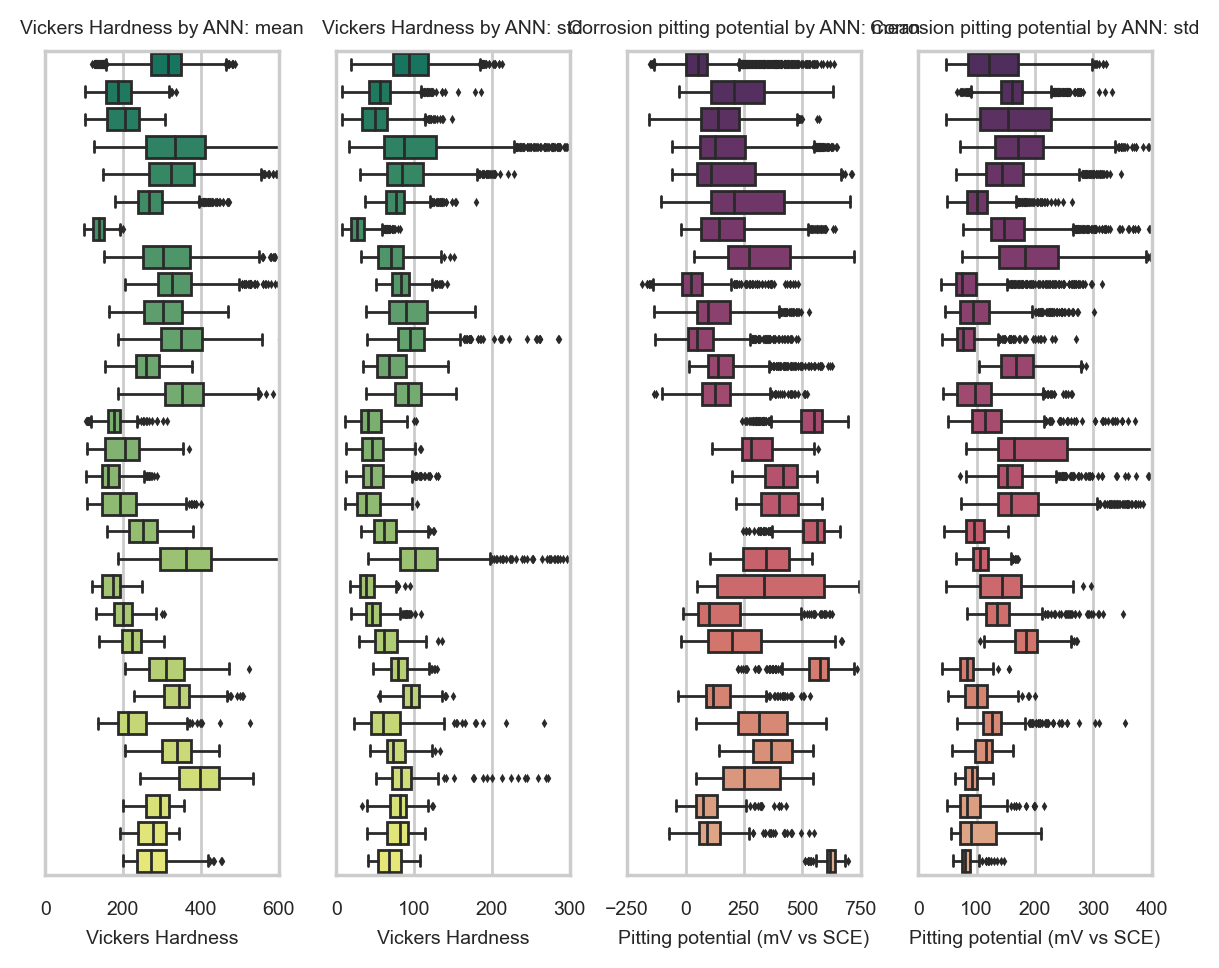

In [28]:
fig, axs = plt.subplots(ncols=4, figsize=(6, 5), dpi=200)
sns.set_theme(style="whitegrid")
font_size = 7
 
sns.boxplot(data = df_H1_C2_sns_30, x="H1_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[0], palette="summer")
# sns.despine(left=True, ax=axs[2])
axs[0].set_title('Vickers Hardness by ANN: mean', fontsize=font_size)
axs[0].set_xlabel('Vickers Hardness', fontsize=font_size)
axs[0].set_ylabel(None)
axs[0].set_yticklabels([])
axs[0].set_xlim([0, 600])
axs[0].tick_params(axis='both', labelsize=font_size)

sns.boxplot(data = df_H1_C2_sns_30, x="H1_new_pred_KFold_std_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[1], palette="summer")
# sns.despine(left=True, ax=axs[2])
axs[1].set_title('Vickers Hardness by ANN: std', fontsize=font_size)
axs[1].set_xlabel('Vickers Hardness', fontsize=font_size)
axs[1].set_ylabel(None)
axs[1].set_yticklabels([])
axs[1].set_xlim([0, 300])
axs[1].tick_params(axis='both', labelsize=font_size)

sns.boxplot(data = df_H1_C2_sns_30, x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[2], palette="flare_r")
# sns.despine(left=True, ax=axs[2])
axs[2].set_title('Corrosion pitting potential by ANN: mean', fontsize=font_size)
axs[2].set_xlabel('Pitting potential (mV vs SCE)', fontsize=font_size)
axs[2].set_ylabel(None)
axs[2].set_yticklabels([])
axs[2].set_xlim([-250, 750])
axs[2].tick_params(axis='both', labelsize=font_size)

sns.boxplot(data = df_H1_C2_sns_30, x="C2_new_pred_KFold_std_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[3], palette="flare_r")
# sns.despine(left=True, ax=axs[2])
axs[3].set_title('Corrosion pitting potential by ANN: std', fontsize=font_size)
axs[3].set_xlabel('Pitting potential (mV vs SCE)', fontsize=font_size)
axs[3].set_ylabel(None)
axs[3].set_yticklabels([])
axs[3].set_xlim([0, 400])
axs[3].tick_params(axis='both', labelsize=font_size)

plt.tight_layout()
# plt.savefig('sns_plot_30', bbox_inches='tight')
plt.show()


#### all alloys by max FCC fraction per palette

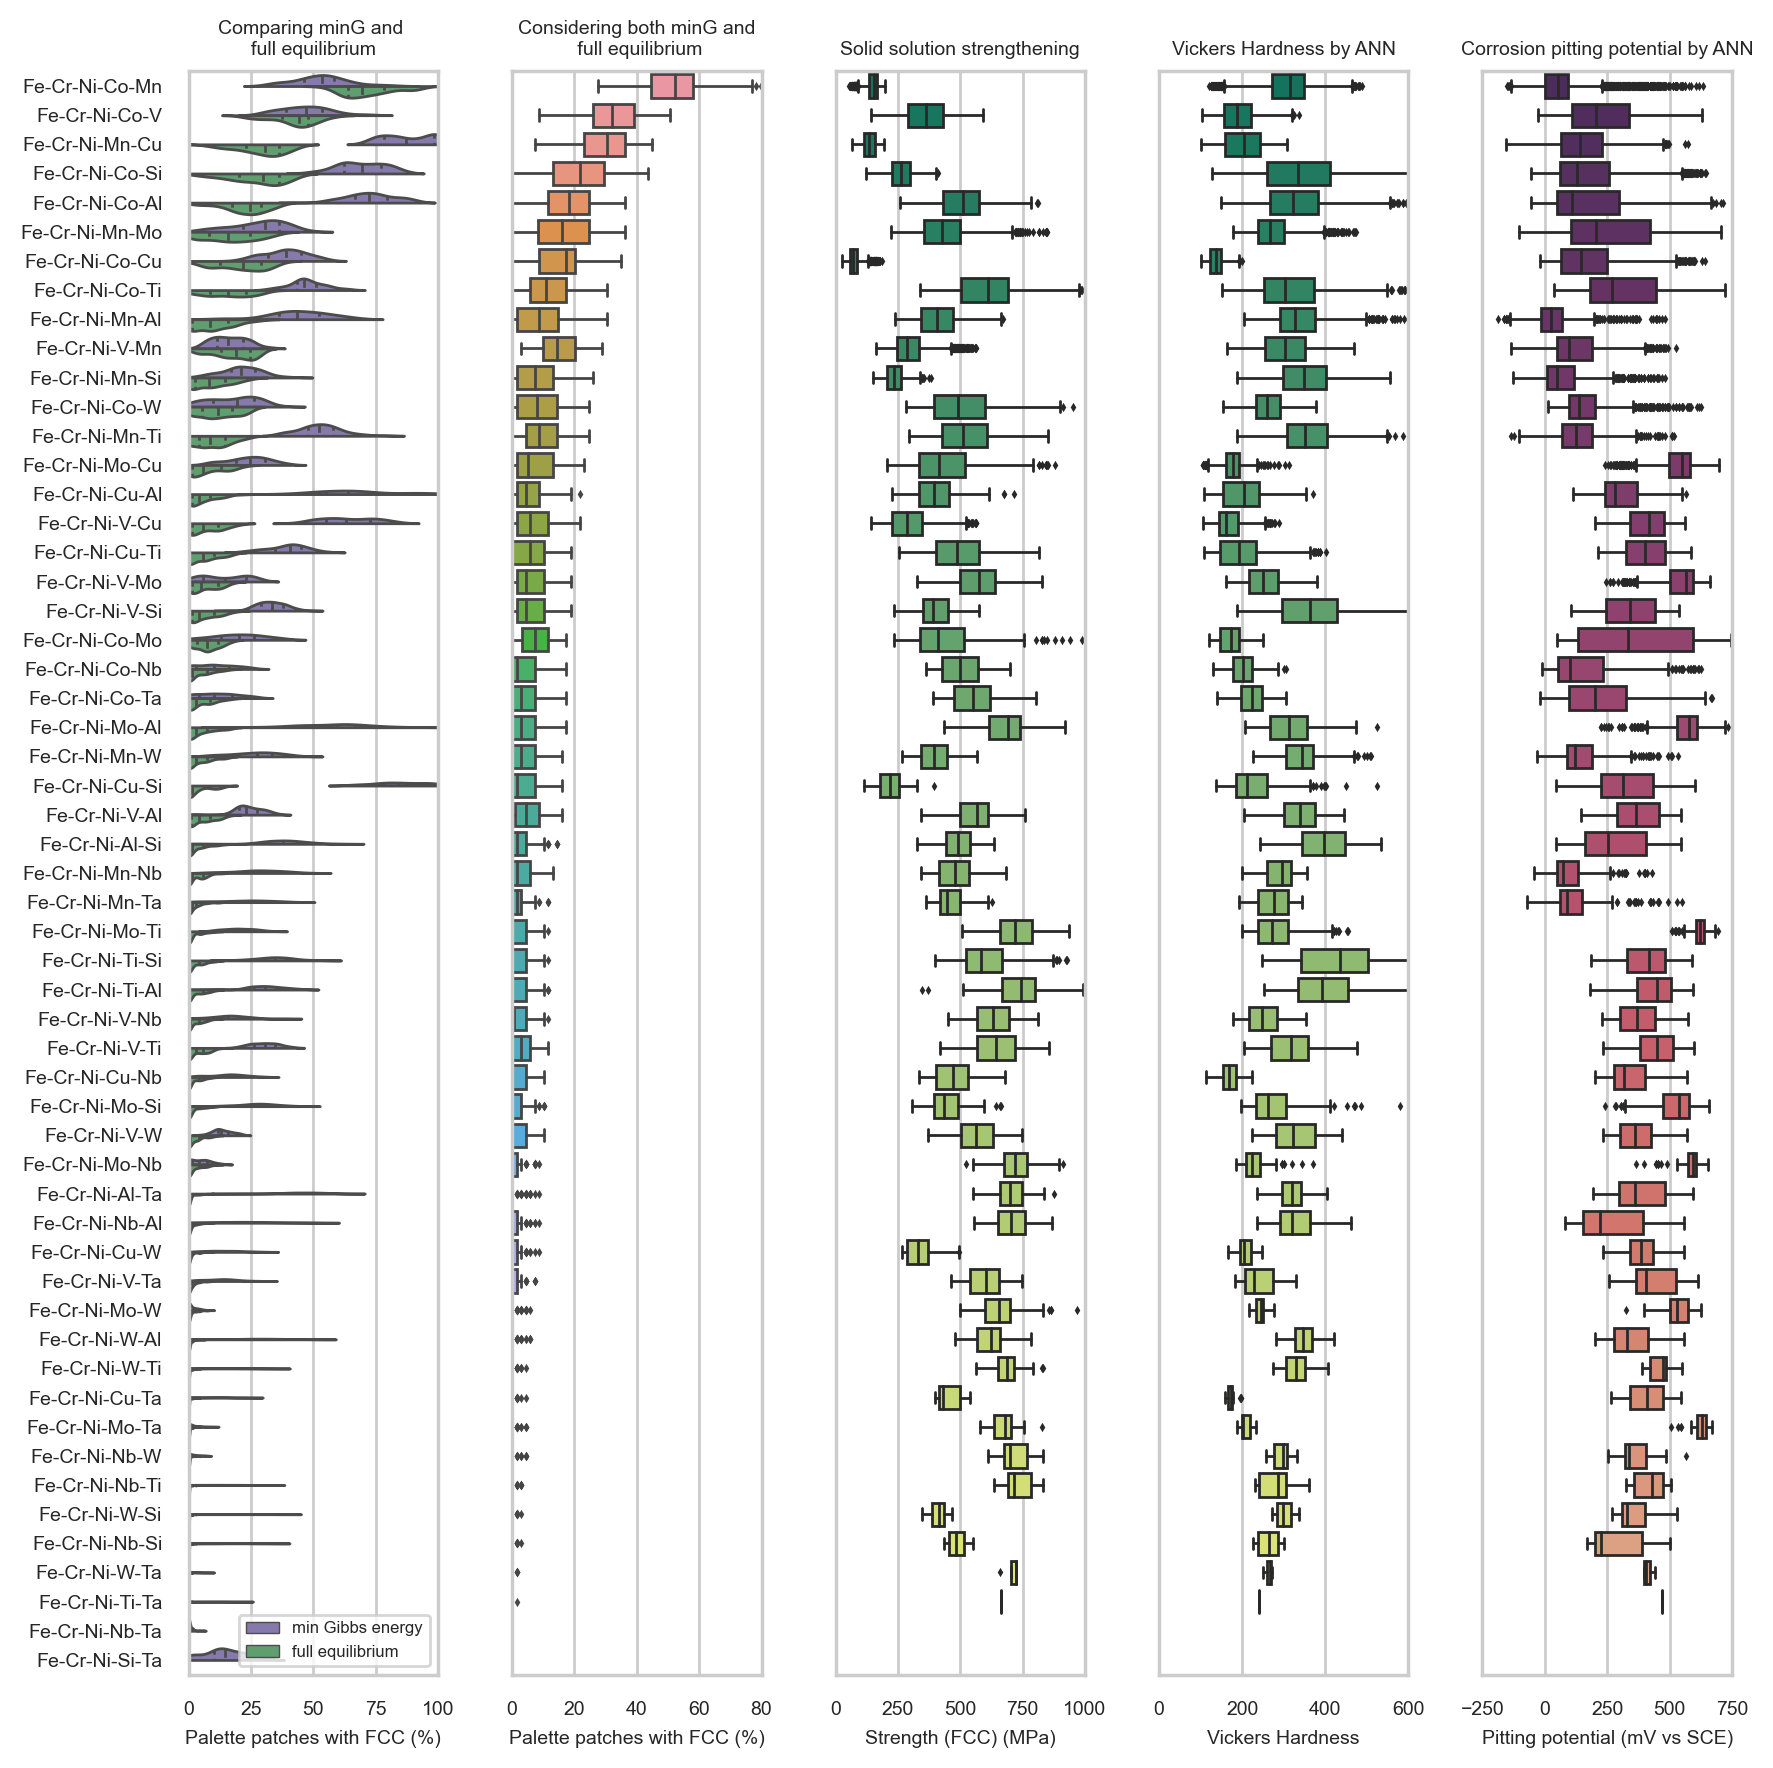

In [29]:
fig, axs = plt.subplots(ncols=5, figsize=(9, 9), dpi=200)
sns.set_theme(style="whitegrid")
font_size = 7

sns.violinplot(data = df_fcc_sns, x="Gmin_vs_eq_FCC_fraction", y="compo_A_B_C_D_E", hue="minG vs.full equil.",
               split=True, inner="quart", linewidth=1,
               palette={"min Gibbs energy": "m", "full equilibrium": "g"}, ax=axs[0])
# sns.despine(left=True, ax=axs[0])
title = "Comparing minG and full equilibrium"
wrapped_title = "\n".join(title[i:i+19] for i in range(0, len(title), 19))
axs[0].set_title(wrapped_title, fontsize=font_size)
axs[0].set_xlabel('Palette patches with FCC (%)', fontsize=font_size)
axs[0].set_ylabel(None)
axs[0].legend(fontsize=font_size-1, loc='lower right')
axs[0].set_xlim([0, 100])
axs[0].tick_params(axis='both', labelsize=font_size)


sns.boxplot(data = df_fcc_sns, x="Gmin_eq_FCC_fraction", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[1]) # palette="summer"
# sns.despine(left=True, ax=axs[1])
title = "Considering both minG and full equilibrium"
wrapped_title = "\n".join(title[i:i+25] for i in range(0, len(title), 25))
axs[1].set_title(wrapped_title, fontsize=font_size)
axs[1].set_xlabel('Palette patches with FCC (%)', fontsize=font_size)
axs[1].set_ylabel(None)
axs[1].set_xlim([0, 80])
axs[1].set_yticklabels([])
axs[1].tick_params(axis='both', labelsize=font_size)


sns.boxplot(data = df_SSS_sns, x="sigma_SSS_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[2], palette="summer")
# sns.despine(left=True, ax=axs[2])
axs[2].set_title('Solid solution strengthening', fontsize=font_size)
axs[2].set_xlabel('Strength (FCC) (MPa)', fontsize=font_size)
axs[2].set_ylabel(None)
axs[2].set_yticklabels([])
axs[2].set_xlim([0, 1000])
axs[2].tick_params(axis='both', labelsize=font_size)


sns.boxplot(data = df_H1_C2_sns, x="H1_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[3], palette="summer")
# sns.despine(left=True, ax=axs[2])
axs[3].set_title('Vickers Hardness by ANN', fontsize=font_size)
axs[3].set_xlabel('Vickers Hardness', fontsize=font_size)
axs[3].set_ylabel(None)
axs[3].set_yticklabels([])
axs[3].set_xlim([0, 600])
axs[3].tick_params(axis='both', labelsize=font_size)

sns.boxplot(data = df_H1_C2_sns, x="C2_new_pred_KFold_mean_FCC", y="compo_A_B_C_D_E", linewidth=1, fliersize=1, ax=axs[4], palette="flare_r")
# sns.despine(left=True, ax=axs[2])
axs[4].set_title('Corrosion pitting potential by ANN', fontsize=font_size)
axs[4].set_xlabel('Pitting potential (mV vs SCE)', fontsize=font_size)
axs[4].set_ylabel(None)
axs[4].set_yticklabels([])
axs[4].set_xlim([-250, 750])
axs[4].tick_params(axis='both', labelsize=font_size)
 

plt.tight_layout()
plt.savefig('sns_plot_full', bbox_inches='tight')
plt.show()